In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import copy
from scipy import sparse

In [2]:
adata = sc.read_h5ad("/project/single_cell/jpark_internship/data/mouse_brain_atlas/mouse_brain_atlas_sparse_matrix.h5ad")

In [3]:
adata

AnnData object with n_obs × n_vars = 292495 × 31053
    obs: 'Age', 'Batch', 'CellCycle', 'CellCycle_G1', 'CellCycle_G2M', 'CellCycle_S', 'Cell_Conc', 'ChipID', 'Class', 'Clusters', 'ClustersCollected', 'DBId', 'Date_Captured', 'DonorID', 'DoubletFinderPCA', 'HPF_LogPP', 'IsCycling', 'Label', 'NCellsCluster', 'NGenes', 'Num_Pooled_Animals', 'PCR_Cycles', 'Plug_Date', 'PseudoAge', 'PseudoTissue', 'Punchcard', 'PunchcardClusters', 'Region', 'Replicate', 'SampleID', 'SampleName', 'Sample_Index', 'Tissue', 'TotalUMI', 'ngperul_cDNA'

In [4]:
age_map = {}
for age in set(adata.obs['Age']): 
    age_map[age] = float(age[1:])

gene_map = {}
gene_map_r = {}
for gene in adata.var.index:
    gene_map[gene.split("|")[1]] = gene
    gene_map_r[gene] = gene.split("|")[1]

In [5]:
adata_sub = adata[(adata.obs['Age'] == 'e13.5') & 
                  (adata.obs['Tissue'] == 'ForebrainDorsal') & 
                  (adata.obs['Class'].isin(['Radial glia','Neuron'])) &
                  (adata.obs['SampleName']=='G23')] #G9

In [6]:
adata_sub = adata_sub[adata_sub.obs['DoubletFinderPCA'] < 0.5]

In [7]:
adata_sub

View of AnnData object with n_obs × n_vars = 2718 × 31053
    obs: 'Age', 'Batch', 'CellCycle', 'CellCycle_G1', 'CellCycle_G2M', 'CellCycle_S', 'Cell_Conc', 'ChipID', 'Class', 'Clusters', 'ClustersCollected', 'DBId', 'Date_Captured', 'DonorID', 'DoubletFinderPCA', 'HPF_LogPP', 'IsCycling', 'Label', 'NCellsCluster', 'NGenes', 'Num_Pooled_Animals', 'PCR_Cycles', 'Plug_Date', 'PseudoAge', 'PseudoTissue', 'Punchcard', 'PunchcardClusters', 'Region', 'Replicate', 'SampleID', 'SampleName', 'Sample_Index', 'Tissue', 'TotalUMI', 'ngperul_cDNA'

In [8]:
sc.pp.filter_genes(adata_sub,min_counts=1)

/project/elkabetz_lab/Daniel/willow/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:249: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_counts'] = number


In [9]:
adata_sub

AnnData object with n_obs × n_vars = 2718 × 15681
    obs: 'Age', 'Batch', 'CellCycle', 'CellCycle_G1', 'CellCycle_G2M', 'CellCycle_S', 'Cell_Conc', 'ChipID', 'Class', 'Clusters', 'ClustersCollected', 'DBId', 'Date_Captured', 'DonorID', 'DoubletFinderPCA', 'HPF_LogPP', 'IsCycling', 'Label', 'NCellsCluster', 'NGenes', 'Num_Pooled_Animals', 'PCR_Cycles', 'Plug_Date', 'PseudoAge', 'PseudoTissue', 'Punchcard', 'PunchcardClusters', 'Region', 'Replicate', 'SampleID', 'SampleName', 'Sample_Index', 'Tissue', 'TotalUMI', 'ngperul_cDNA'
    var: 'n_counts'

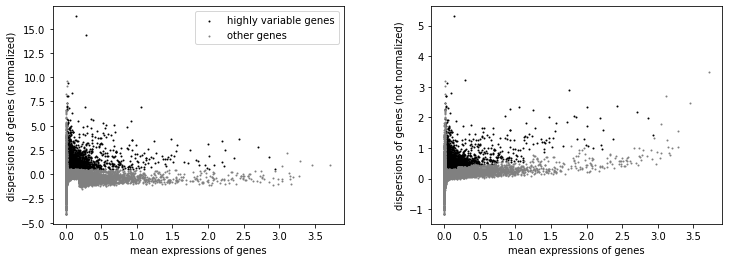

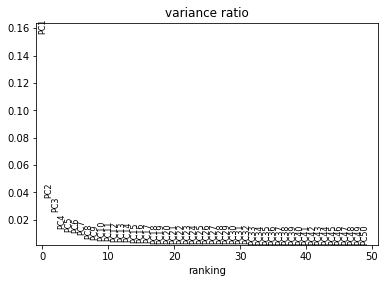

In [10]:
sc.pp.normalize_total(adata_sub,)#, target_sum=1e6)#, inplace=False)
adata_sub.X = np.log1p(adata_sub.X)

sc.pp.highly_variable_genes(adata_sub)#,min_mean = min_mean,min_disp=min_disp,max_mean=max_mean)
sc.pl.highly_variable_genes(adata_sub)

#run PCA
sc.tl.pca(adata_sub, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata_sub, log=False, n_pcs=50)

sc.pp.neighbors(adata_sub)
sc.tl.umap(adata_sub)

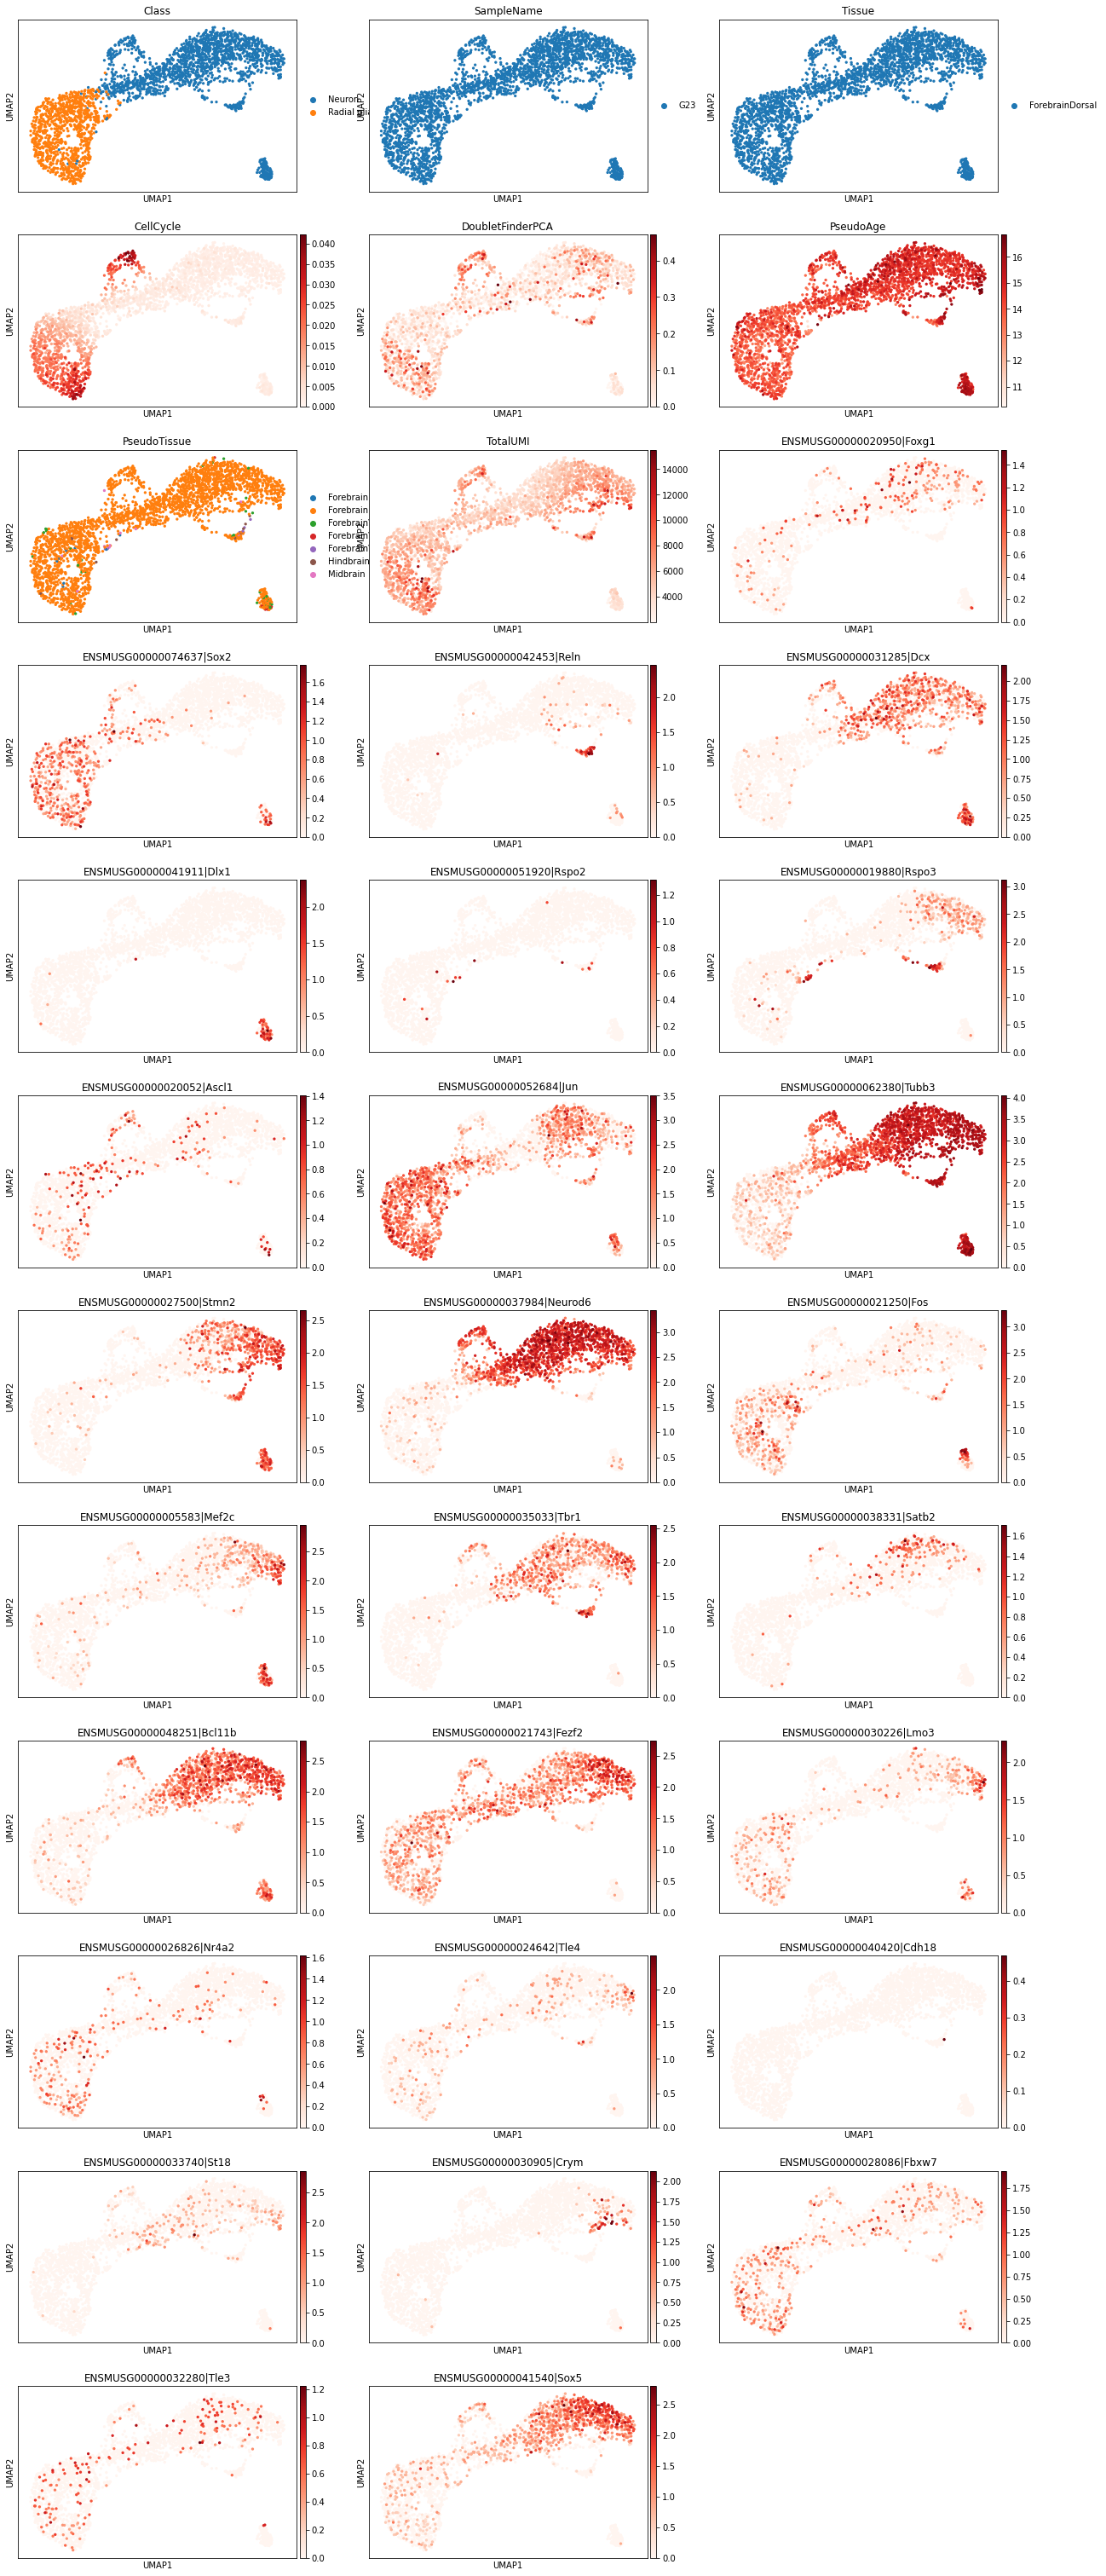

In [11]:
sc.pl.umap(adata_sub,color=['Class','SampleName','Tissue','CellCycle','DoubletFinderPCA','PseudoAge', 'PseudoTissue',
                            'TotalUMI',gene_map['Foxg1'],gene_map['Sox2'],gene_map['Reln'],
                            gene_map['Dcx'],gene_map['Dlx1'],gene_map['Rspo2'],gene_map['Rspo3'],
                           gene_map['Ascl1'],gene_map['Jun'],gene_map['Tubb3'],gene_map['Stmn2'],
                           gene_map['Neurod6'],gene_map['Fos'],gene_map['Mef2c'],gene_map['Tbr1'],
                           gene_map['Satb2'],gene_map['Bcl11b'],gene_map['Fezf2'],gene_map['Lmo3'],
                           gene_map['Nr4a2'],gene_map['Tle4'],gene_map['Cdh18'],gene_map['St18'],
                           gene_map['Crym'],gene_map['Fbxw7'],gene_map['Tle3'],gene_map['Sox5']],
           ncols=3,color_map='Reds')

In [12]:
set(adata_sub.obs[adata_sub.obs['Tissue']=='ForebrainDorsal']['Class'])

{'Neuron', 'Radial glia'}

In [13]:
sc.tl.louvain(adata_sub,resolution=1.5)

In [14]:
adata_sub

AnnData object with n_obs × n_vars = 2718 × 15681
    obs: 'Age', 'Batch', 'CellCycle', 'CellCycle_G1', 'CellCycle_G2M', 'CellCycle_S', 'Cell_Conc', 'ChipID', 'Class', 'Clusters', 'ClustersCollected', 'DBId', 'Date_Captured', 'DonorID', 'DoubletFinderPCA', 'HPF_LogPP', 'IsCycling', 'Label', 'NCellsCluster', 'NGenes', 'Num_Pooled_Animals', 'PCR_Cycles', 'Plug_Date', 'PseudoAge', 'PseudoTissue', 'Punchcard', 'PunchcardClusters', 'Region', 'Replicate', 'SampleID', 'SampleName', 'Sample_Index', 'Tissue', 'TotalUMI', 'ngperul_cDNA', 'louvain'
    var: 'n_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'pca', 'neighbors', 'umap', 'Class_colors', 'SampleName_colors', 'Tissue_colors', 'PseudoTissue_colors', 'louvain'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

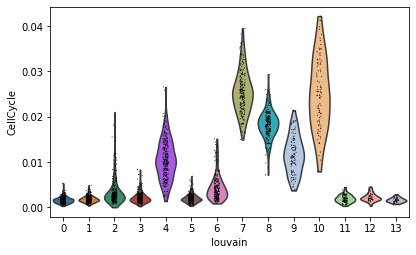

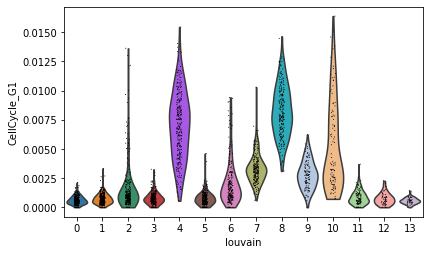

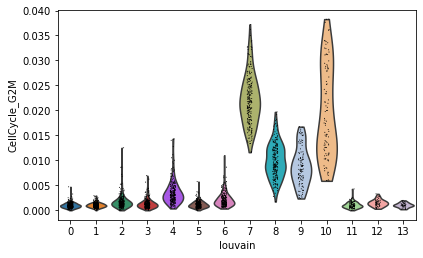

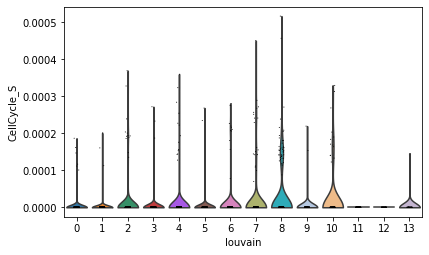

In [15]:
sc.pl.violin(adata_sub,keys=['CellCycle'],groupby='louvain')
sc.pl.violin(adata_sub,keys=['CellCycle_G1'],groupby='louvain')
sc.pl.violin(adata_sub,keys=['CellCycle_G2M'],groupby='louvain')
sc.pl.violin(adata_sub,keys=['CellCycle_S'],groupby='louvain')

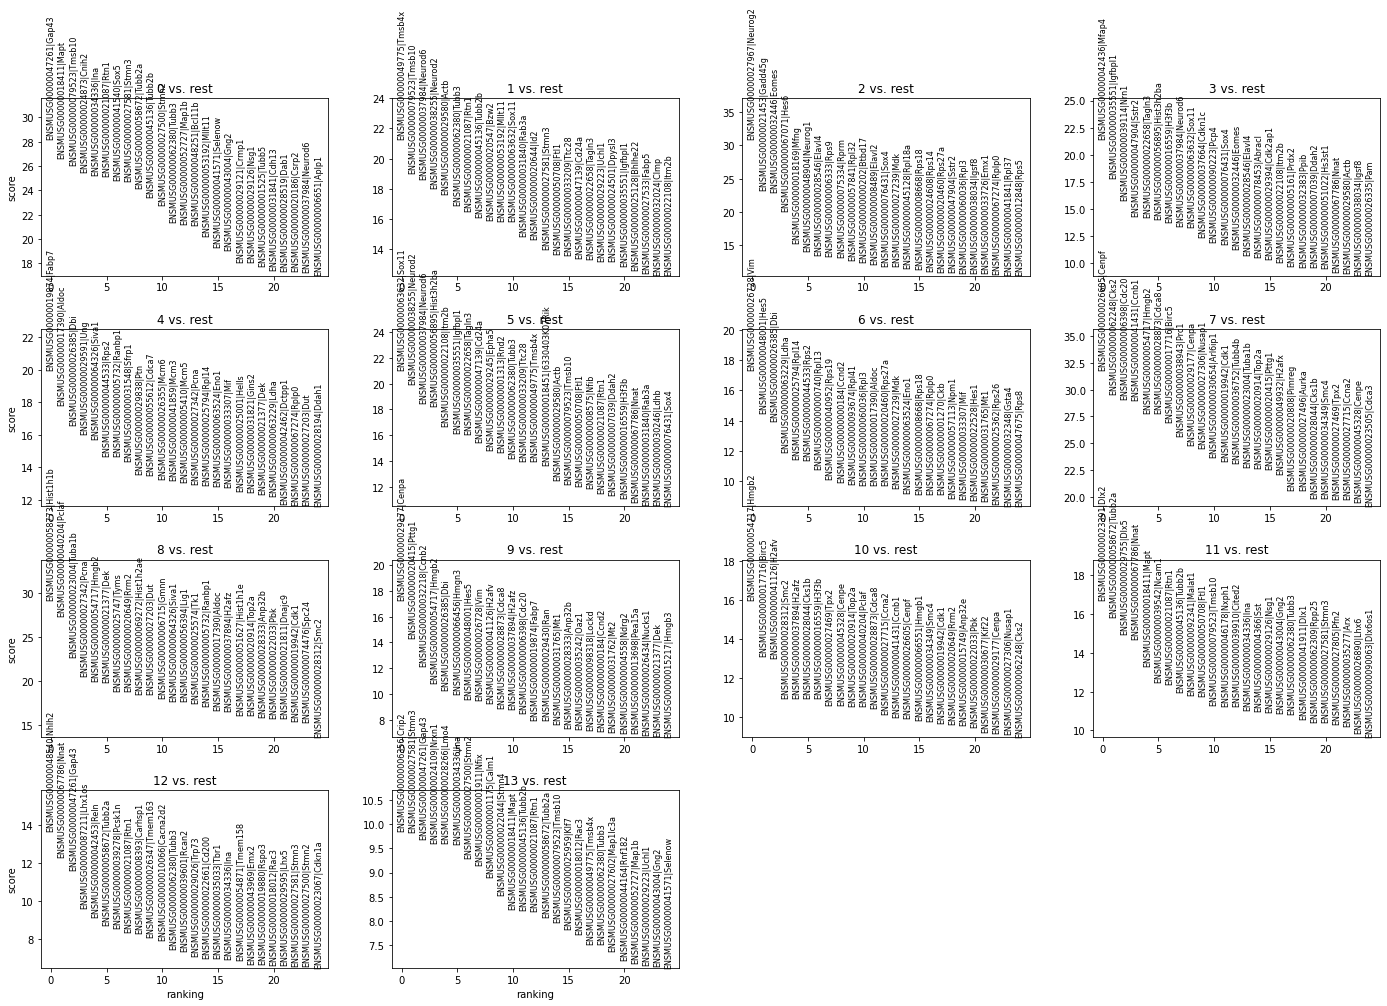

In [16]:
## run marker gene analysis
sc.tl.rank_genes_groups(adata_sub, 'louvain', method='t-test_overestim_var', n_genes=40000)
sc.pl.rank_genes_groups(adata_sub, n_genes=25, sharey=False)

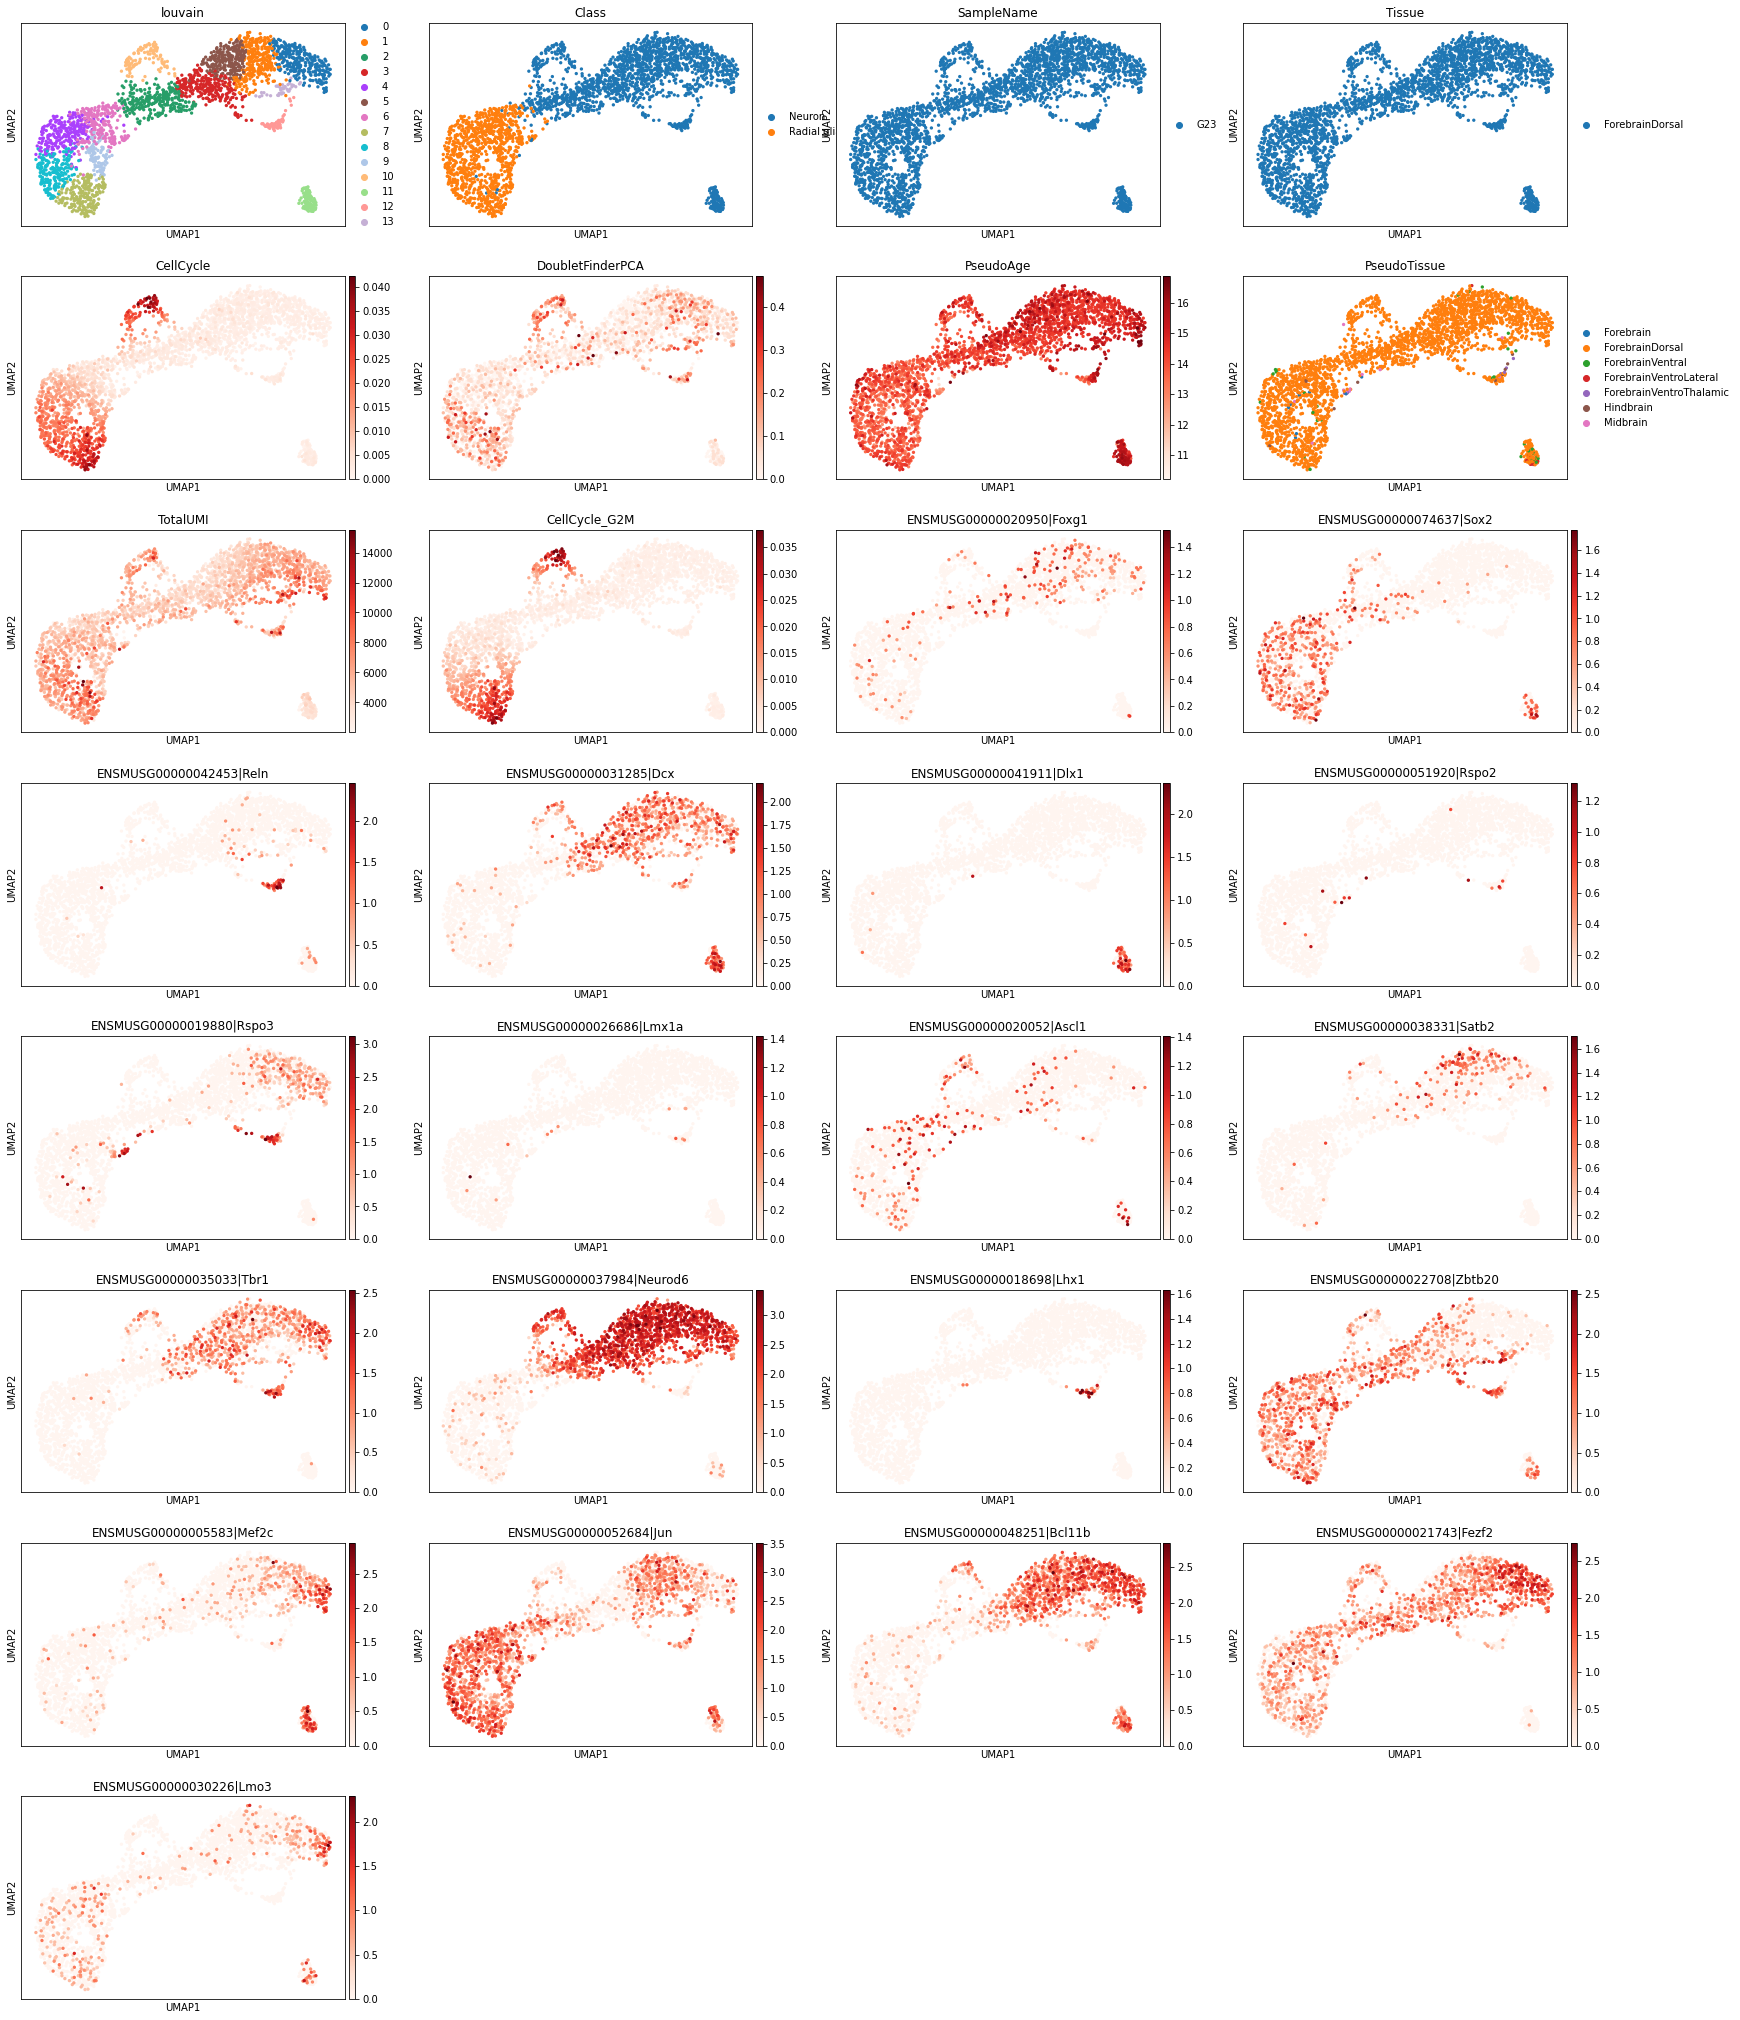

In [17]:
sc.pl.umap(adata_sub,color=['louvain','Class','SampleName','Tissue','CellCycle','DoubletFinderPCA','PseudoAge', 'PseudoTissue',
                            'TotalUMI','CellCycle_G2M',gene_map['Foxg1'],gene_map['Sox2'],gene_map['Reln'],
                            gene_map['Dcx'],gene_map['Dlx1'],gene_map['Rspo2'],gene_map['Rspo3'],gene_map['Lmx1a'],
                           gene_map['Ascl1'],gene_map['Satb2'],gene_map['Tbr1'],gene_map['Neurod6'],
                           gene_map['Lhx1'],gene_map['Zbtb20'],gene_map['Mef2c'],
                           gene_map['Jun'],gene_map['Bcl11b'],gene_map['Fezf2'],gene_map['Lmo3']],
           color_map='Reds')

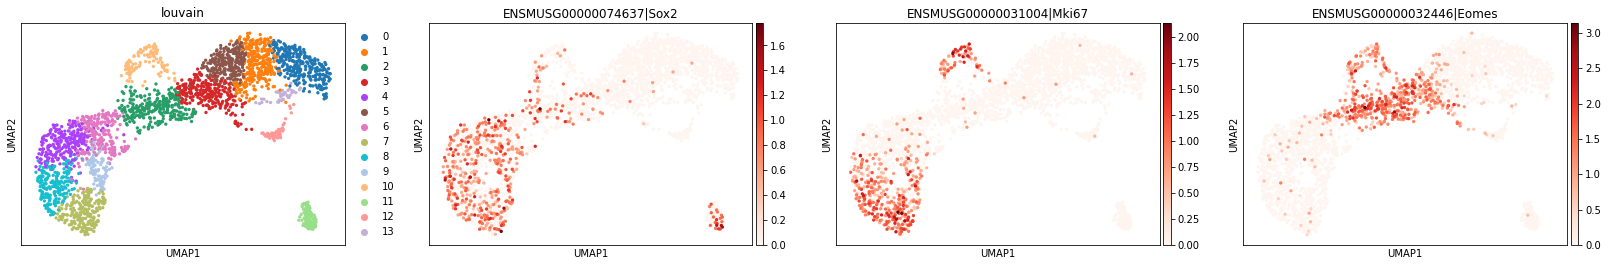

In [18]:
sc.pl.umap(adata_sub,color=['louvain',gene_map['Sox2'],gene_map['Mki67'],gene_map['Eomes']],
           color_map='Reds')

In [19]:
#clusters to filter: 11 - Subpallium, 12 - Cajal-Retzius, 7,8,9,10 -- dividing, 0 - RSPO3+LMO3+MEF2C+ neuron (not cortical), 
# 13 -- other neuron

In [20]:
clust_dict = {'11':'Subpallium Neuron','12':'Cajal Retzius Neuron','7':'Forebrain Dorsal NSC Dividing',
                 '8':'Forebrain Dorsal NSC Dividing','9':'Forebrain Dorsal NSC Dividing','10':'Forebrain Dorsal IP Dividing',
                 '0':'Hippocampal Neuron','13':'Hippocampal Neuron'}

In [21]:
cell_type_dict = {}
for cell,louv in zip(adata_sub.obs.index,adata_sub.obs['louvain']):
    if louv in clust_dict:
        cell_type_dict[cell] = clust_dict[louv]

In [22]:
adata_sub_full = copy.deepcopy(adata_sub)

In [23]:
adata_sub = adata_sub[~(adata_sub.obs['louvain'].isin(['0','7','8','9','10','11','12','13']))]

In [24]:
adata_sub = adata[adata_sub.obs.index,adata_sub.var.index]

In [25]:
sc.pp.normalize_total(adata_sub,)#, target_sum=1e6)#, inplace=False)
adata_sub.X = np.log1p(adata_sub.X)

/project/elkabetz_lab/Daniel/willow/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


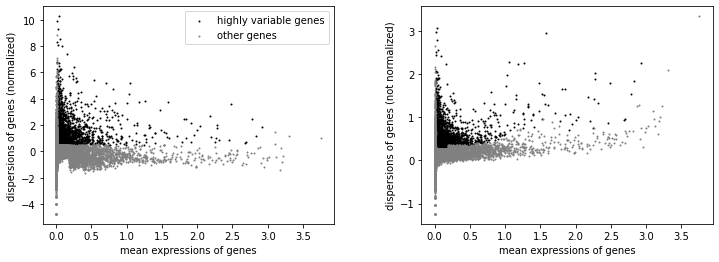

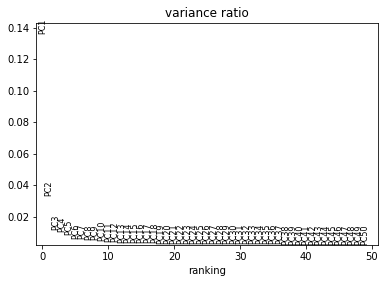

In [26]:
sc.pp.highly_variable_genes(adata_sub)#,min_mean = min_mean,min_disp=min_disp,max_mean=max_mean)
sc.pl.highly_variable_genes(adata_sub)

#run PCA
sc.tl.pca(adata_sub, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata_sub, log=False, n_pcs=50)

sc.pp.neighbors(adata_sub)
sc.tl.umap(adata_sub)

In [27]:
sc.tl.louvain(adata_sub,resolution=2)

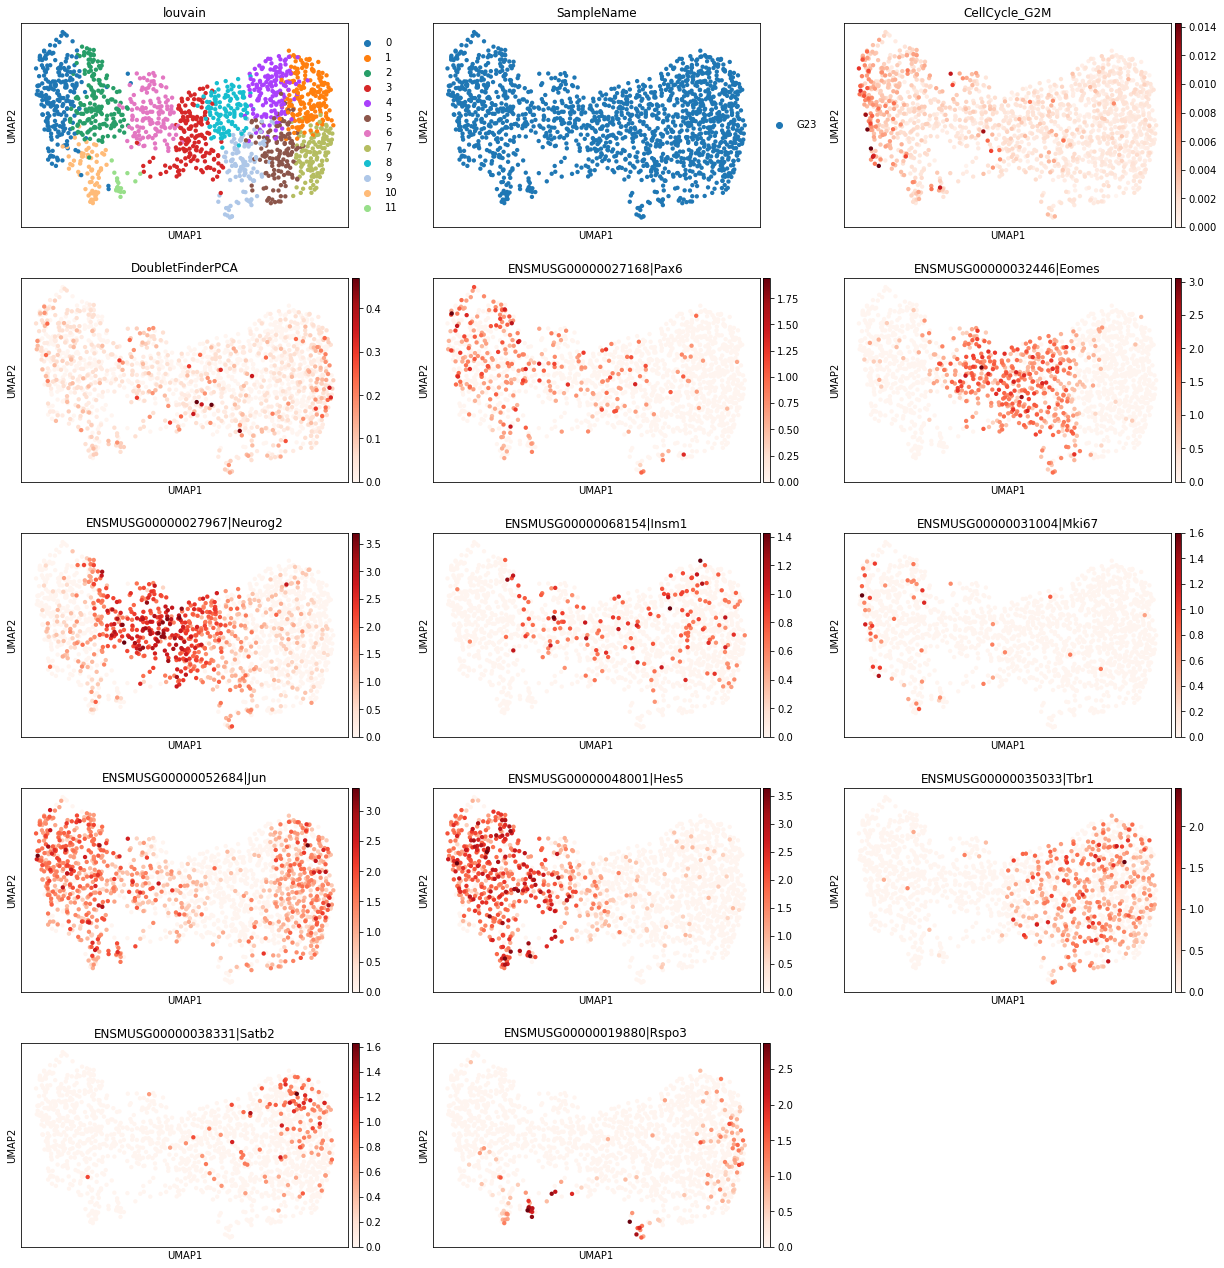

In [28]:
sc.pl.umap(adata_sub,color=['louvain','SampleName','CellCycle_G2M','DoubletFinderPCA',
                            gene_map['Pax6'],gene_map['Eomes'],gene_map['Neurog2'],gene_map['Insm1'],
                           gene_map['Mki67'],gene_map['Jun'],gene_map['Hes5'],gene_map['Tbr1'],gene_map['Satb2'],
                           gene_map['Rspo3']],
           ncols=3,color_map='Reds')

In [29]:
#clusters to filter: 11 - Hippocampal NSC

In [30]:
clust_dict = {'11':'Hippocampal NSC'}

In [31]:
for cell,louv in zip(adata_sub.obs.index,adata_sub.obs['louvain']):
    if louv in clust_dict:
        cell_type_dict[cell] = clust_dict[louv]

In [32]:
adata_sub = adata_sub[~(adata_sub.obs['louvain'].isin(['11']))]

In [33]:
adata_sub = adata[adata_sub.obs.index,adata_sub.var.index]

In [34]:
sc.pp.normalize_total(adata_sub,)#, target_sum=1e6)#, inplace=False)
adata_sub.X = np.log1p(adata_sub.X)

/project/elkabetz_lab/Daniel/willow/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


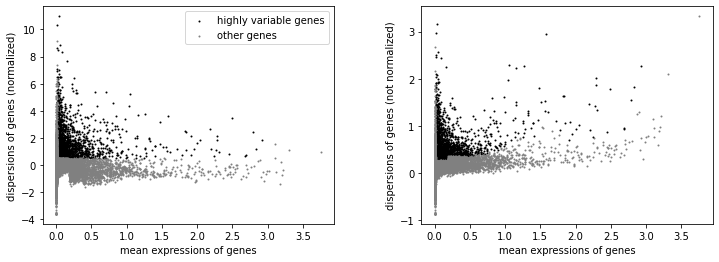

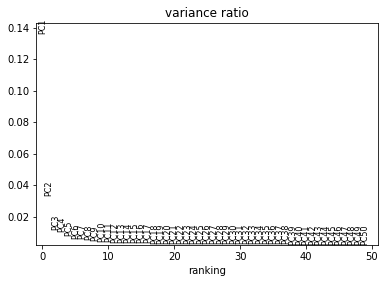

In [35]:
sc.pp.highly_variable_genes(adata_sub)#,min_mean = min_mean,min_disp=min_disp,max_mean=max_mean)
sc.pl.highly_variable_genes(adata_sub)

#run PCA
sc.tl.pca(adata_sub, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata_sub, log=False, n_pcs=50)

sc.pp.neighbors(adata_sub)
sc.tl.umap(adata_sub)

In [36]:
sc.tl.louvain(adata_sub,resolution=3)

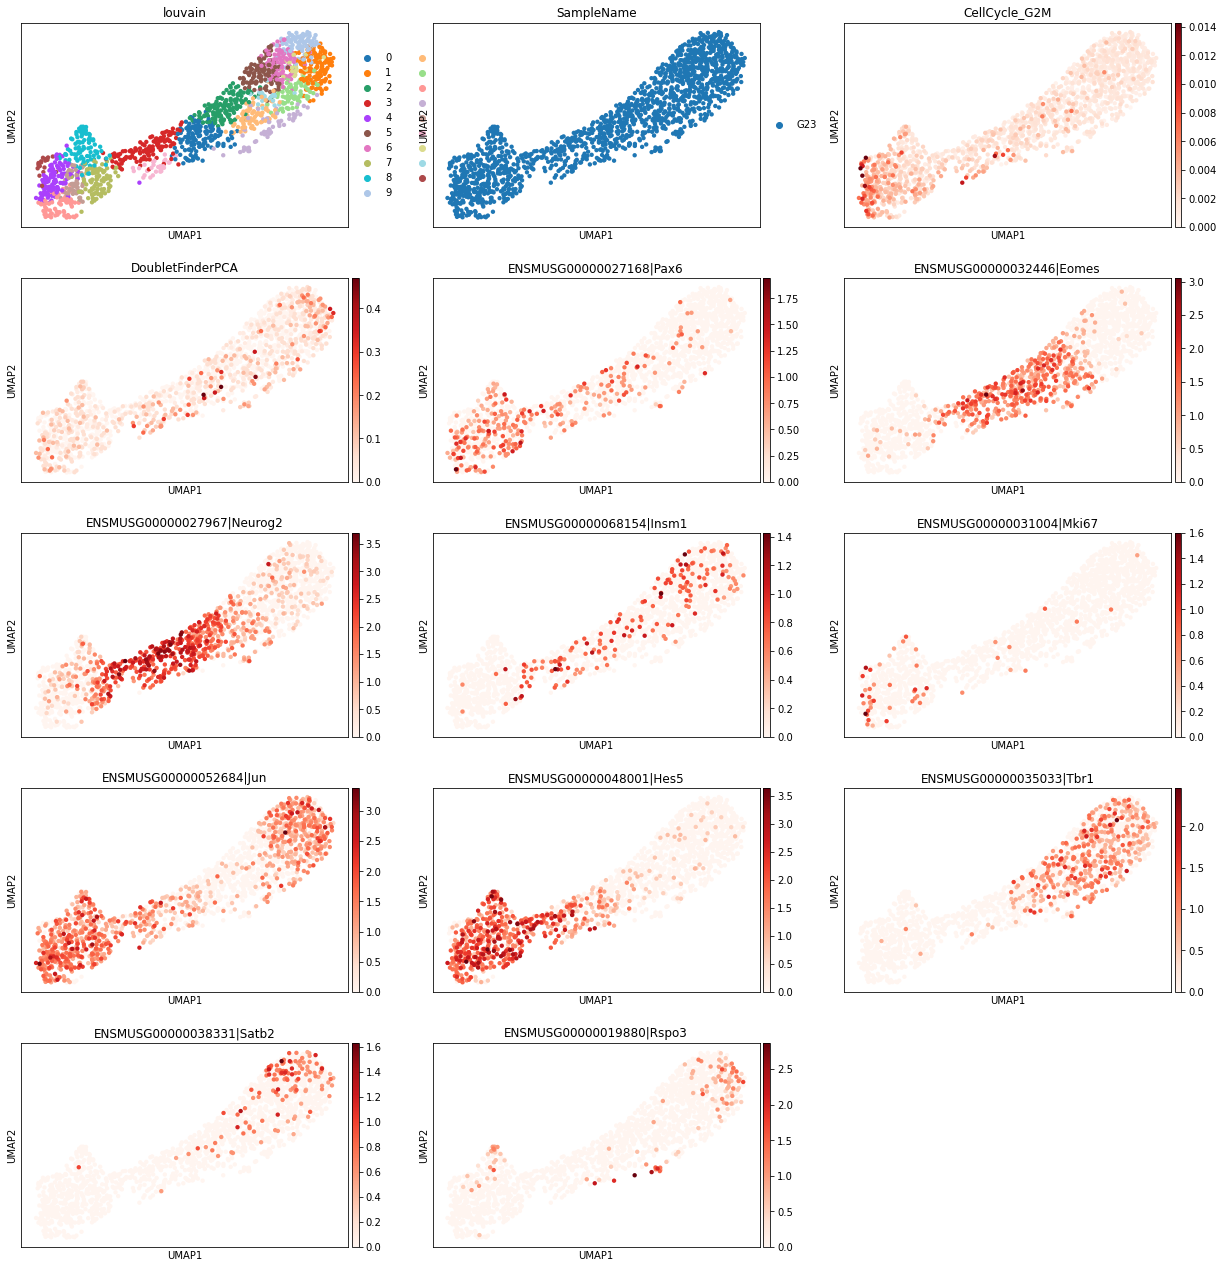

In [37]:
sc.pl.umap(adata_sub,color=['louvain','SampleName','CellCycle_G2M','DoubletFinderPCA',
                            gene_map['Pax6'],gene_map['Eomes'],gene_map['Neurog2'],gene_map['Insm1'],
                           gene_map['Mki67'],gene_map['Jun'],gene_map['Hes5'],gene_map['Tbr1'],gene_map['Satb2'],
                           gene_map['Rspo3']],
           ncols=3,color_map='Reds')

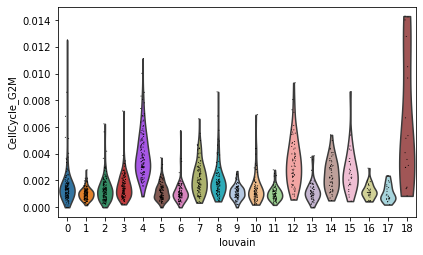

In [38]:
sc.pl.violin(adata_sub,keys=['CellCycle_G2M'],groupby='louvain')

In [39]:
#clusters to filter: 13 - Hippocampal IP, 18 - Cycling

In [40]:
clust_dict = {'13':'Hippocampal IP','18':'Forebrain Dorsal NSC Dividing'}

In [41]:
for cell,louv in zip(adata_sub.obs.index,adata_sub.obs['louvain']):
    if louv in clust_dict:
        cell_type_dict[cell] = clust_dict[louv]

In [42]:
adata_sub = adata_sub[~(adata_sub.obs['louvain'].isin(['13','18']))]

In [43]:
adata_sub = adata[adata_sub.obs.index,adata_sub.var.index]

In [44]:
sc.pp.normalize_total(adata_sub,)#, target_sum=1e6)#, inplace=False)
adata_sub.X = np.log1p(adata_sub.X)

/project/elkabetz_lab/Daniel/willow/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


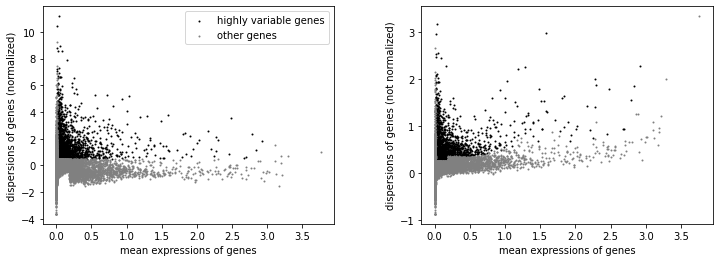

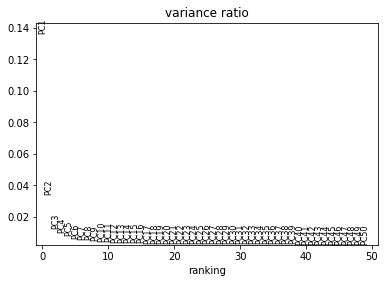

In [45]:
sc.pp.highly_variable_genes(adata_sub)#,min_mean = min_mean,min_disp=min_disp,max_mean=max_mean)
sc.pl.highly_variable_genes(adata_sub)

#run PCA
sc.tl.pca(adata_sub, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata_sub, log=False, n_pcs=50)

sc.pp.neighbors(adata_sub)
sc.tl.umap(adata_sub)

In [46]:
sc.tl.louvain(adata_sub,resolution=2)

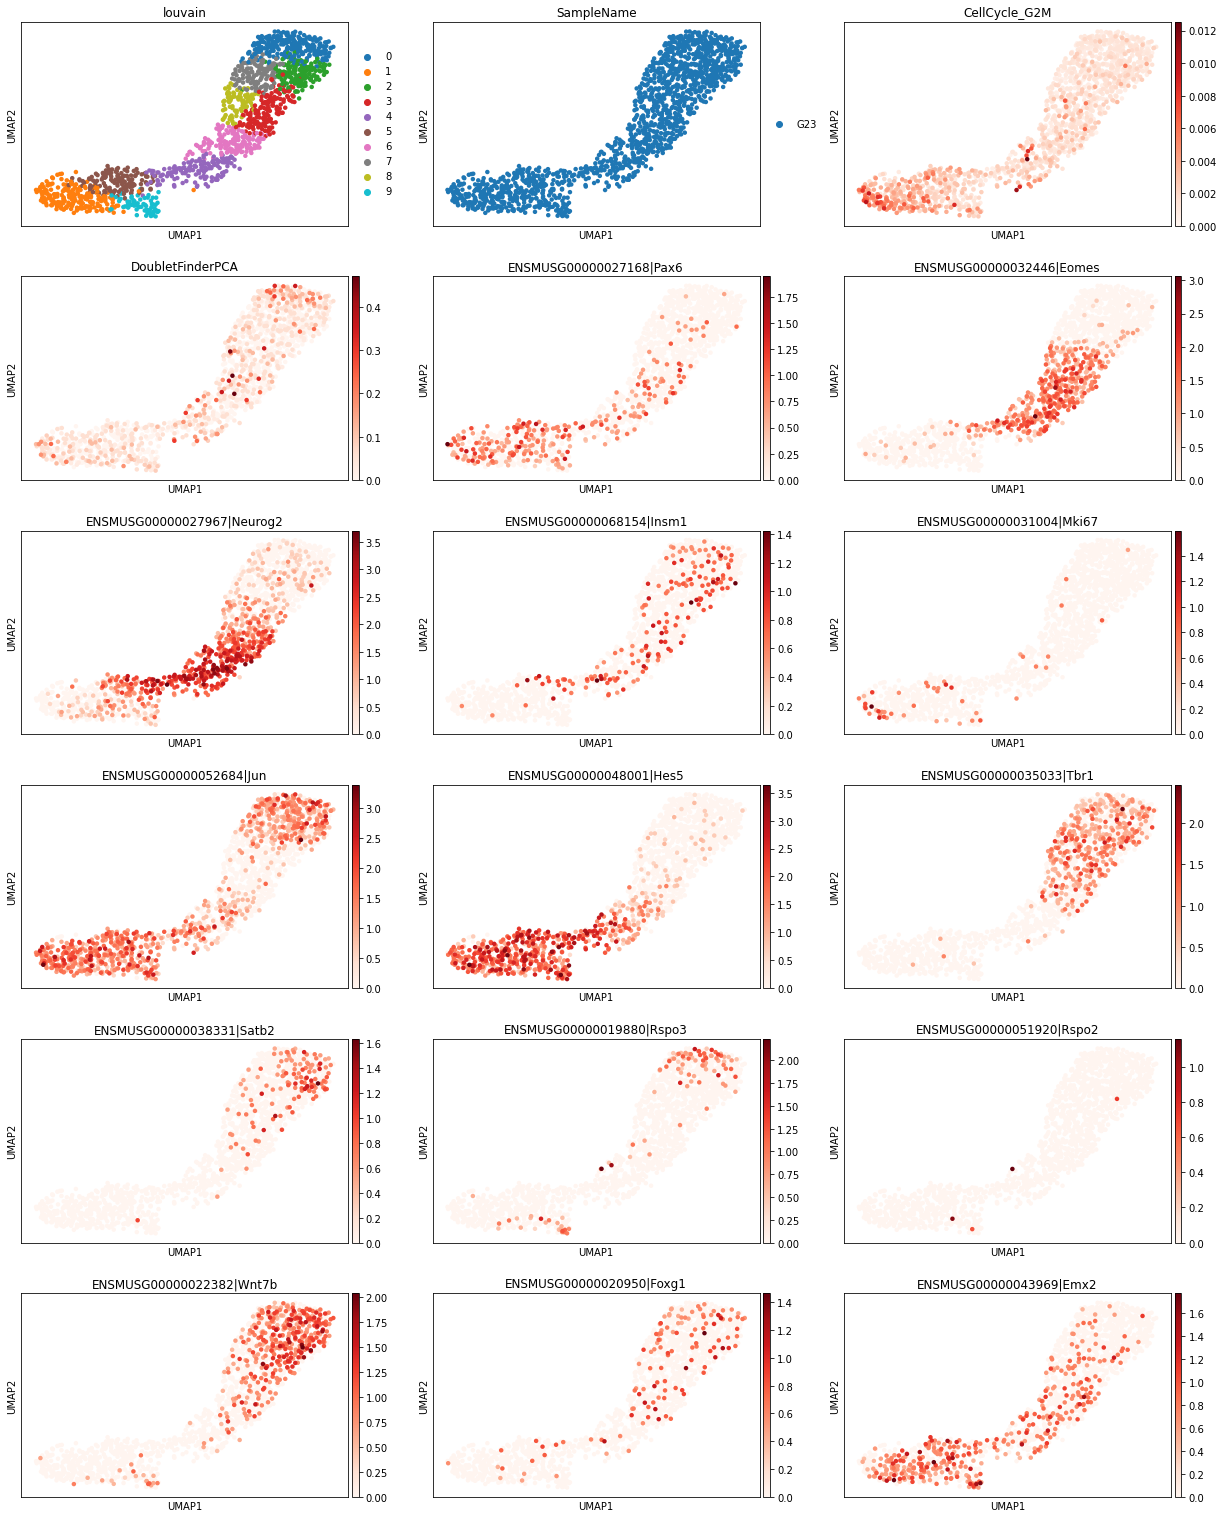

In [47]:
sc.pl.umap(adata_sub,color=['louvain','SampleName','CellCycle_G2M','DoubletFinderPCA',
                            gene_map['Pax6'],gene_map['Eomes'],gene_map['Neurog2'],gene_map['Insm1'],
                           gene_map['Mki67'],gene_map['Jun'],gene_map['Hes5'],gene_map['Tbr1'],gene_map['Satb2'],
                           gene_map['Rspo3'],gene_map['Rspo2'],
                            gene_map['Wnt7b'],gene_map['Foxg1'],gene_map['Emx2']],
           ncols=3,color_map='Reds')

In [48]:
#clusters to filter: 9 - Hippocampal NSC

In [49]:
clust_dict = {'9':'Hippocampal NSC'}

In [50]:
for cell,louv in zip(adata_sub.obs.index,adata_sub.obs['louvain']):
    if louv in clust_dict:
        cell_type_dict[cell] = clust_dict[louv]

In [51]:
adata_sub = adata_sub[~(adata_sub.obs['louvain'].isin(['9']))]

In [52]:
adata_sub = adata[adata_sub.obs.index,adata_sub.var.index]

In [53]:
sc.pp.normalize_total(adata_sub,)#, target_sum=1e6)#, inplace=False)
adata_sub.X = np.log1p(adata_sub.X)

/project/elkabetz_lab/Daniel/willow/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


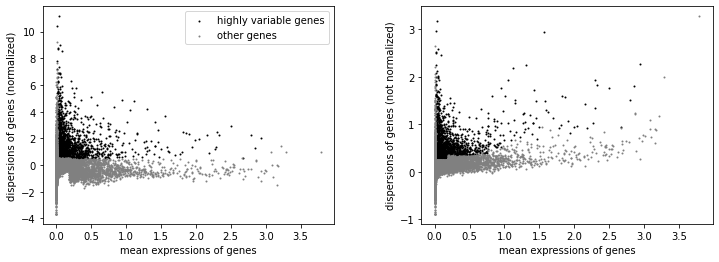

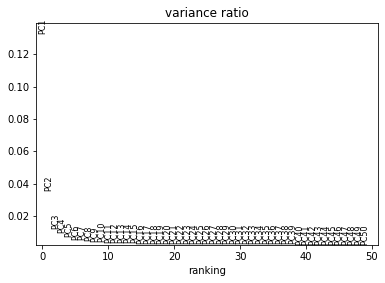

In [54]:
sc.pp.highly_variable_genes(adata_sub)#,min_mean = min_mean,min_disp=min_disp,max_mean=max_mean)
sc.pl.highly_variable_genes(adata_sub)

#run PCA
sc.tl.pca(adata_sub, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata_sub, log=False, n_pcs=50)

sc.pp.neighbors(adata_sub)
sc.tl.umap(adata_sub)

In [55]:
sc.tl.louvain(adata_sub,resolution=1)

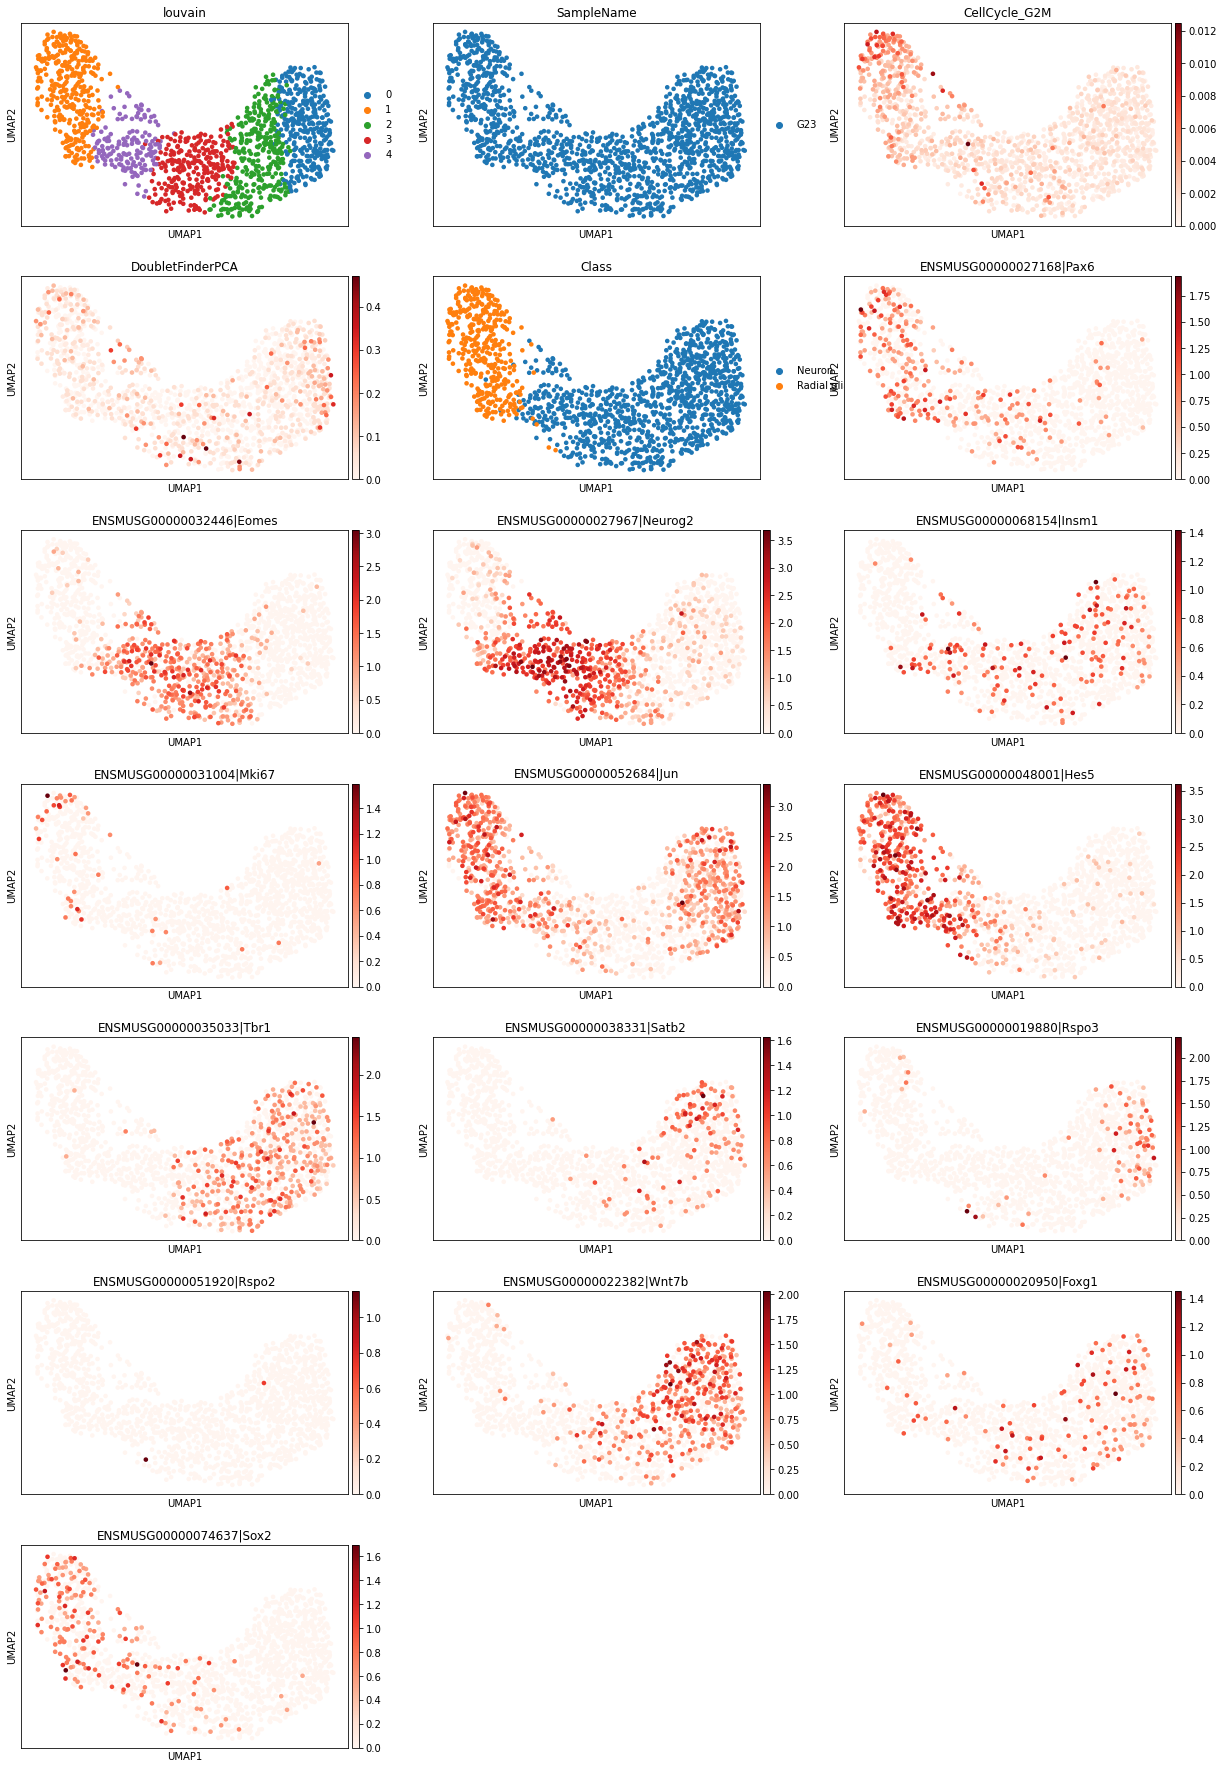

In [56]:
sc.pl.umap(adata_sub,color=['louvain','SampleName','CellCycle_G2M','DoubletFinderPCA','Class',
                            gene_map['Pax6'],gene_map['Eomes'],gene_map['Neurog2'],gene_map['Insm1'],
                           gene_map['Mki67'],gene_map['Jun'],gene_map['Hes5'],gene_map['Tbr1'],gene_map['Satb2'],
                           gene_map['Rspo3'],gene_map['Rspo2'],
                            gene_map['Wnt7b'],gene_map['Foxg1'],gene_map['Sox2']],
           ncols=3,color_map='Reds')

In [57]:
clust_dict = {'1':'Forebrain Dorsal NSC','0':'Forebrain Dorsal Neuron','2':'Forebrain Dorsal Neuron',
              '3':'Forebrain Dorsal IP','4':'Forebrain Dorsal IP'}
for cell,louv in zip(adata_sub.obs.index,adata_sub.obs['louvain']):
    if louv in clust_dict:
        cell_type_dict[cell] = clust_dict[louv]

In [58]:
adata_sub_full.obs['cell_type_fine'] = [cell_type_dict[cell] for cell in adata_sub_full.obs.index]

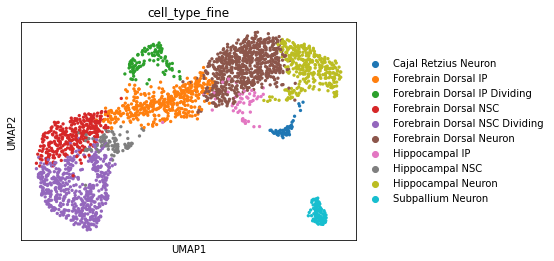

In [59]:
sc.pl.umap(adata_sub_full,color=['cell_type_fine'],
           ncols=3,color_map='Reds')

In [60]:
sc.pp.neighbors(adata_sub,method='gauss',n_neighbors=30)
sc.tl.diffmap(adata_sub)

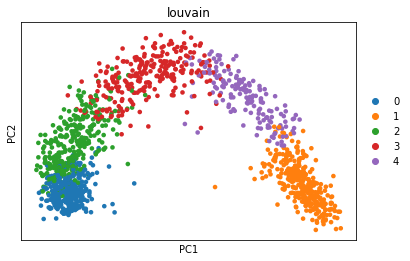

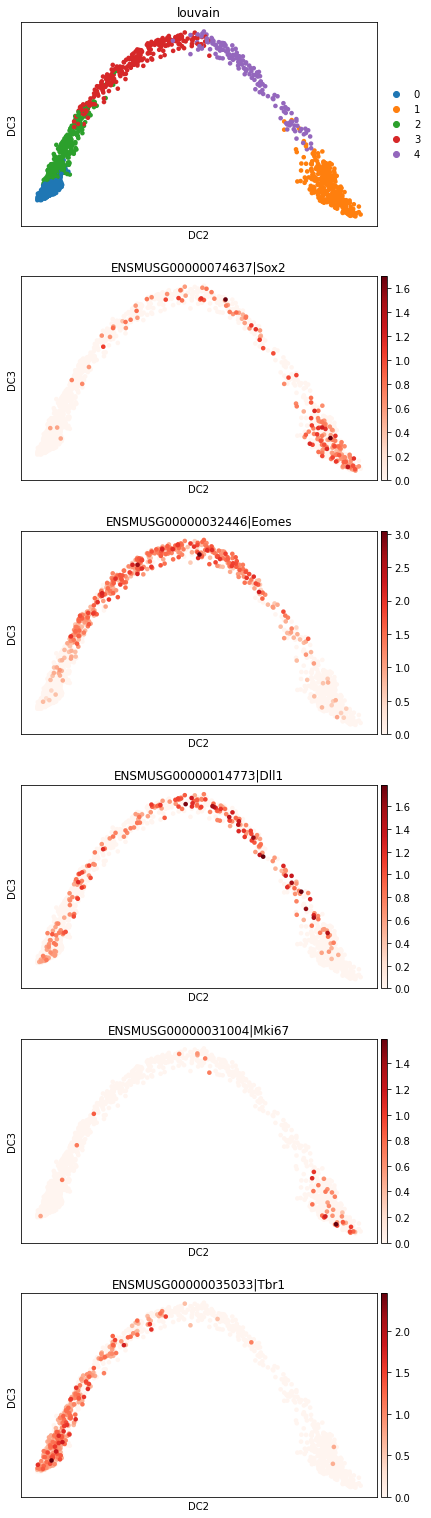

In [61]:
sc.pl.pca(adata_sub,color=['louvain'],color_map='Reds',components='1,2')
sc.pl.diffmap(adata_sub,color=['louvain',gene_map['Sox2'],gene_map['Eomes'],gene_map['Dll1'],gene_map['Mki67'],gene_map['Tbr1']],color_map='Reds',components='2,3',ncols=1)

In [62]:
adata_sub.uns['iroot'] = np.argmax(adata_sub.obsm['X_diffmap'][:,1])

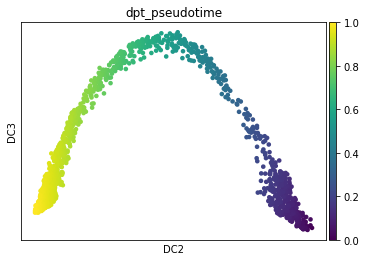

In [63]:
sc.tl.dpt(adata_sub)
sc.pl.diffmap(adata_sub,color=['dpt_pseudotime'],color_map='viridis',components='2,3')

In [64]:
genes = list(adata_sub.var.index)

In [65]:
adata_sub.obs['index'] = range(len(adata_sub.obs))

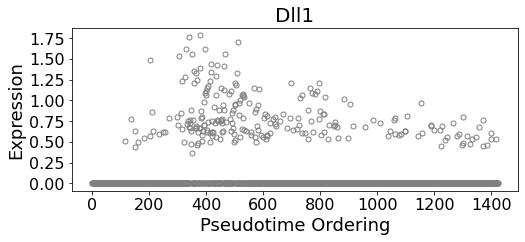

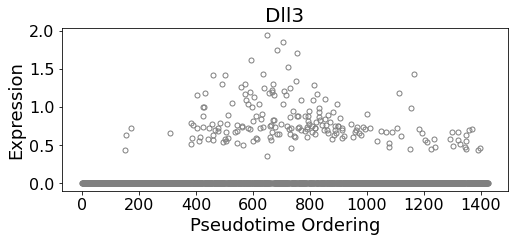

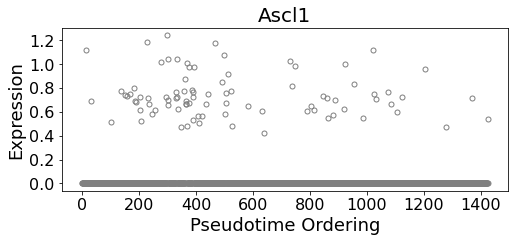

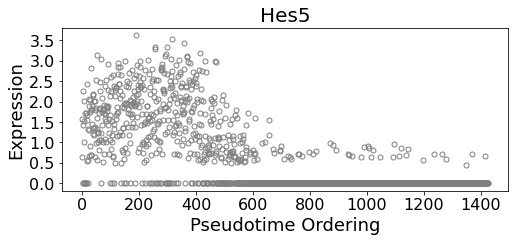

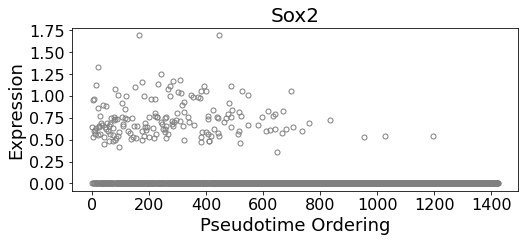

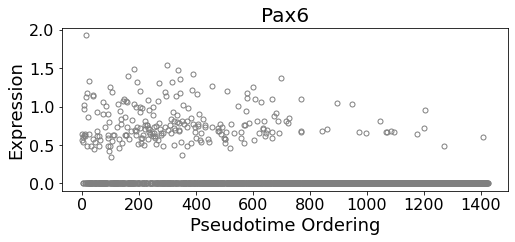

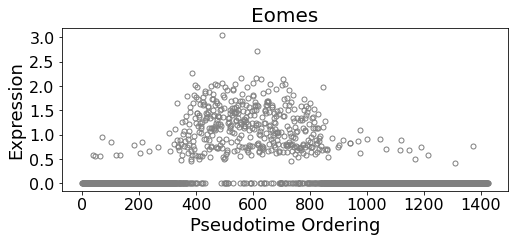

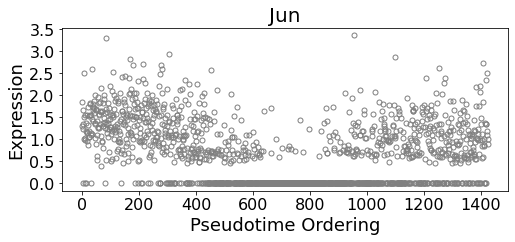

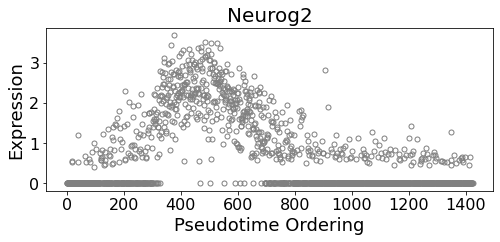

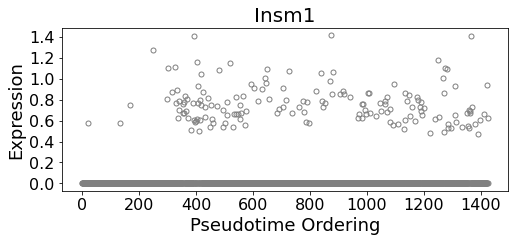

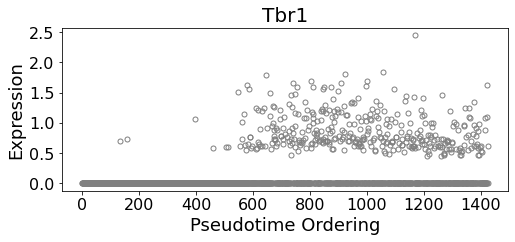

In [66]:
for gene in ['Dll1','Dll3','Ascl1','Hes5','Sox2','Pax6','Eomes','Jun','Neurog2','Insm1','Tbr1']:
    ordered_expression = adata_sub[:,gene_map[gene]].X[adata_sub.obs.sort_values(by='dpt_pseudotime')['index']].toarray()
    xdata = range(len(ordered_expression))
    plt.figure(figsize=(8,3))
    plt.plot(xdata, ordered_expression,'.', markerfacecolor='None',color='gray', lw=0.1, markersize=10, alpha=1,zorder=-1)
    plt.title(gene,fontsize=20)
    plt.xlabel('Pseudotime Ordering',fontsize=18)
    plt.ylabel('Expression',fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

In [67]:
len(adata_sub.obs)

1425

In [68]:
import matplotlib
matplotlib.use('Agg')
from matplotlib import gridspec
from matplotlib.colors import Normalize
from matplotlib import cm
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
norm = matplotlib.colors.Normalize(vmin=0, vmax=20)

import matplotlib.font_manager as font_manager
font_dirs = ['/project/elkabetz_lab_data/tools/PythonFonts/', ]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
matplotlib.rcParams['font.family'] = 'arial'

In [69]:
adata_sub.obs['cell_type_fine'] = [cell_type_dict[cell] for cell in adata_sub.obs.index]

/project/elkabetz_lab/Daniel/willow/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1026: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)
/project/elkabetz_lab/Daniel/willow/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1026: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)


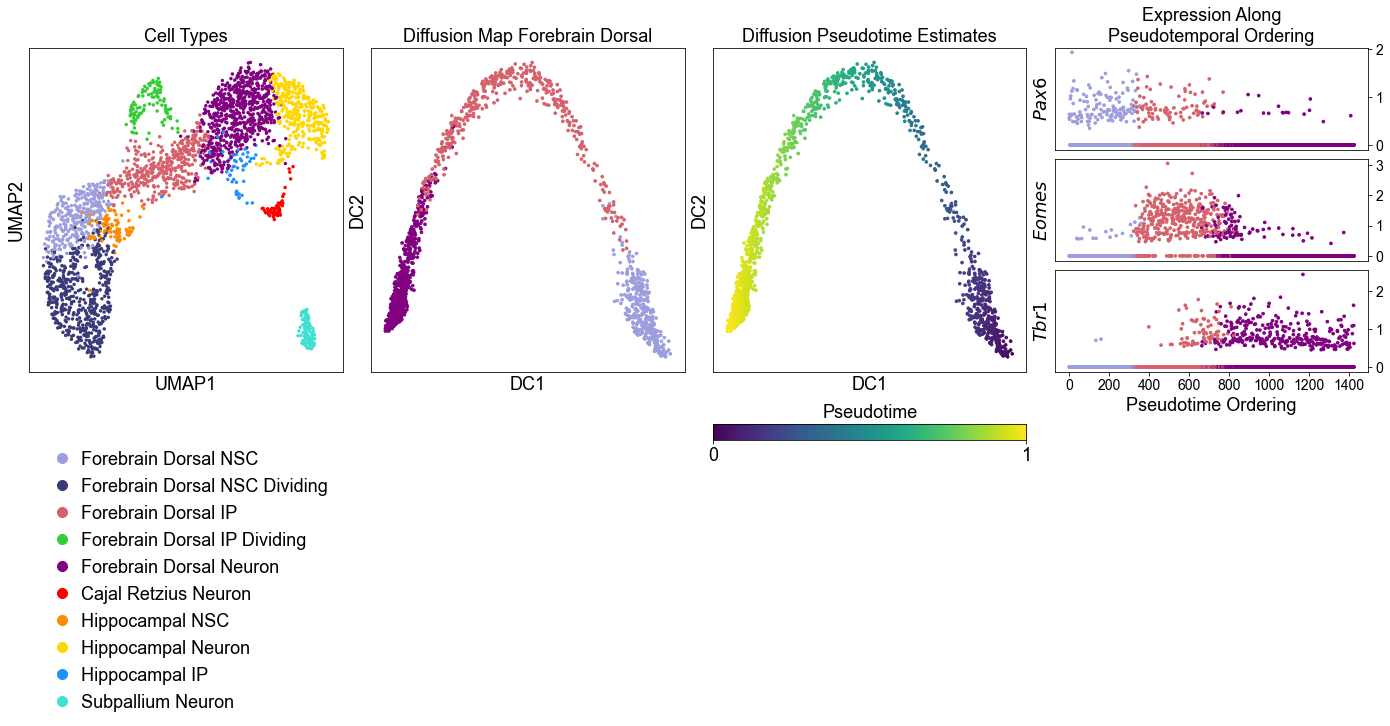

In [70]:
color_dict = {'Forebrain Dorsal NSC':cm.tab20b(norm(3)),'Forebrain Dorsal NSC Dividing':cm.tab20b(norm(0)),
              'Forebrain Dorsal IP':cm.tab20b(norm(14)),
              'Forebrain Dorsal IP Dividing':'limegreen','Forebrain Dorsal Neuron':'purple',
              'Cajal Retzius Neuron':'red','Hippocampal NSC':'darkorange',
              'Hippocampal Neuron':'gold','Hippocampal IP':'dodgerblue','Subpallium Neuron':'turquoise'}


plt.figure(figsize=(24,8))
gs = gridspec.GridSpec(8,24,wspace=1, hspace=0.2)
ax = plt.subplot(gs[:6,:6])

final_colors = []
for j,cell in enumerate(adata_sub_full.obs['cell_type_fine']):
    if cell in color_dict:
        final_colors.append(color_dict[cell])
    else:
        final_colors.append('lightgray')

plt.scatter(adata_sub_full.obsm['X_umap'][:,0],adata_sub_full.obsm['X_umap'][:,1],c=final_colors,s=12,ec=None)
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
for j,cell_type in enumerate(color_dict):
    plt.plot(-10000,-10000,'.',color=color_dict[cell_type],label=cell_type,markersize=20)

#plt.plot(-10000,-10000,'.',color='lightgray',label='other',markersize=20)
plt.title('Cell Types', fontsize=18)
plt.xlabel('UMAP1',fontsize=18)
plt.ylabel('UMAP2',fontsize=18)
plt.xticks([])
plt.yticks([])
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -1.1),fontsize=18,edgecolor='None',handletextpad=0.1)

ax = plt.subplot(gs[:6,6:12])
x = adata_sub.obsm['X_diffmap'][:,1]
y = adata_sub.obsm['X_diffmap'][:,2]
cell_types = adata_sub.obs['cell_type_fine']
plt.scatter(x,y,s=7,c=[color_dict[x] for x in cell_types])
plt.title('Diffusion Map Forebrain Dorsal', fontsize=18)
plt.xlabel('DC1',fontsize=18)
plt.ylabel('DC2',fontsize=18)
plt.xticks([])
plt.yticks([])

ax = plt.subplot(gs[:6,12:18])
x = adata_sub.obsm['X_diffmap'][:,1]
y = adata_sub.obsm['X_diffmap'][:,2]
plt.scatter(x,y,s=7,cmap='viridis',c=adata_sub.obs['dpt_pseudotime'])
plt.title('Diffusion Pseudotime Estimates', fontsize=18)
plt.xlabel('DC1',fontsize=18)
plt.ylabel('DC2',fontsize=18)
plt.xticks([])
plt.yticks([])

ax = plt.subplot(gs[6:,12:18])
cmap = plt.cm.get_cmap('viridis')
colors = cmap(np.arange(cmap.N))
ax.imshow([colors], extent=[0, 10, 0, 0.5])
plt.xticks([0,10],[0,1],fontsize=18)
plt.yticks([])
plt.title('Pseudotime',fontsize=18)

xdata = range(len(adata_sub.obs))
adata_sub.obs['index'] = xdata
adata_sub.var['index'] = range(len(adata_sub.var))
ordered_index = adata_sub.obs.sort_values(by='dpt_pseudotime')['index']
colors = [color_dict[x] for x in adata_sub.obs.sort_values(by='dpt_pseudotime')['cell_type_fine']]
for j,gene in enumerate([gene_map['Pax6'],gene_map['Eomes'],gene_map['Tbr1']]):
    ax = plt.subplot(gs[j*2:(j+1)*2,18:])
    gene_idx = adata_sub.var.loc[gene]['index']
    plt.scatter(xdata,[x[0] for x in adata_sub.X[ordered_index,gene_idx].toarray()],c=colors,s=7)
    ax.yaxis.tick_right()
    max_yticks = int(plt.ylim()[1])
    plt.yticks(range(max_yticks+1),fontsize=14)
    plt.ylabel(r'$\it{'+gene_map_r[gene]+'}$',fontsize=18)
    #ax2 = ax.twinx()
    #ax2.set_ylabel(gene,fontsize=18)
    #ax2.set_yticks([])
    if j != 2: plt.xticks([])
    else: 
        plt.xticks(fontsize=14)
        plt.xlabel('Pseudotime Ordering',fontsize=18)
    if j == 0:
        plt.title('Expression Along\nPseudotemporal Ordering',fontsize=18)
plt.suptitle('',fontsize=24)#'Mouse e13.5 Forebrain Dorsal Sample G23',y=0.98,fontsize=24)
plt.savefig('figures_paper_mouse_data/supp_figures/forebrain_dorsal_g23_pseuodtime_expression_overview.pdf',bbox_inches='tight')

In [79]:
import pickle as pkl

In [80]:
output = open('data/e13.5_forebrain_dorsal_traj_adata_g23.pkl', 'wb')
pkl.dump(adata_sub, output)
output.close()

/project/elkabetz_lab/Daniel/willow/lib/python3.9/site-packages/scanpy/plotting/_utils.py:314: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


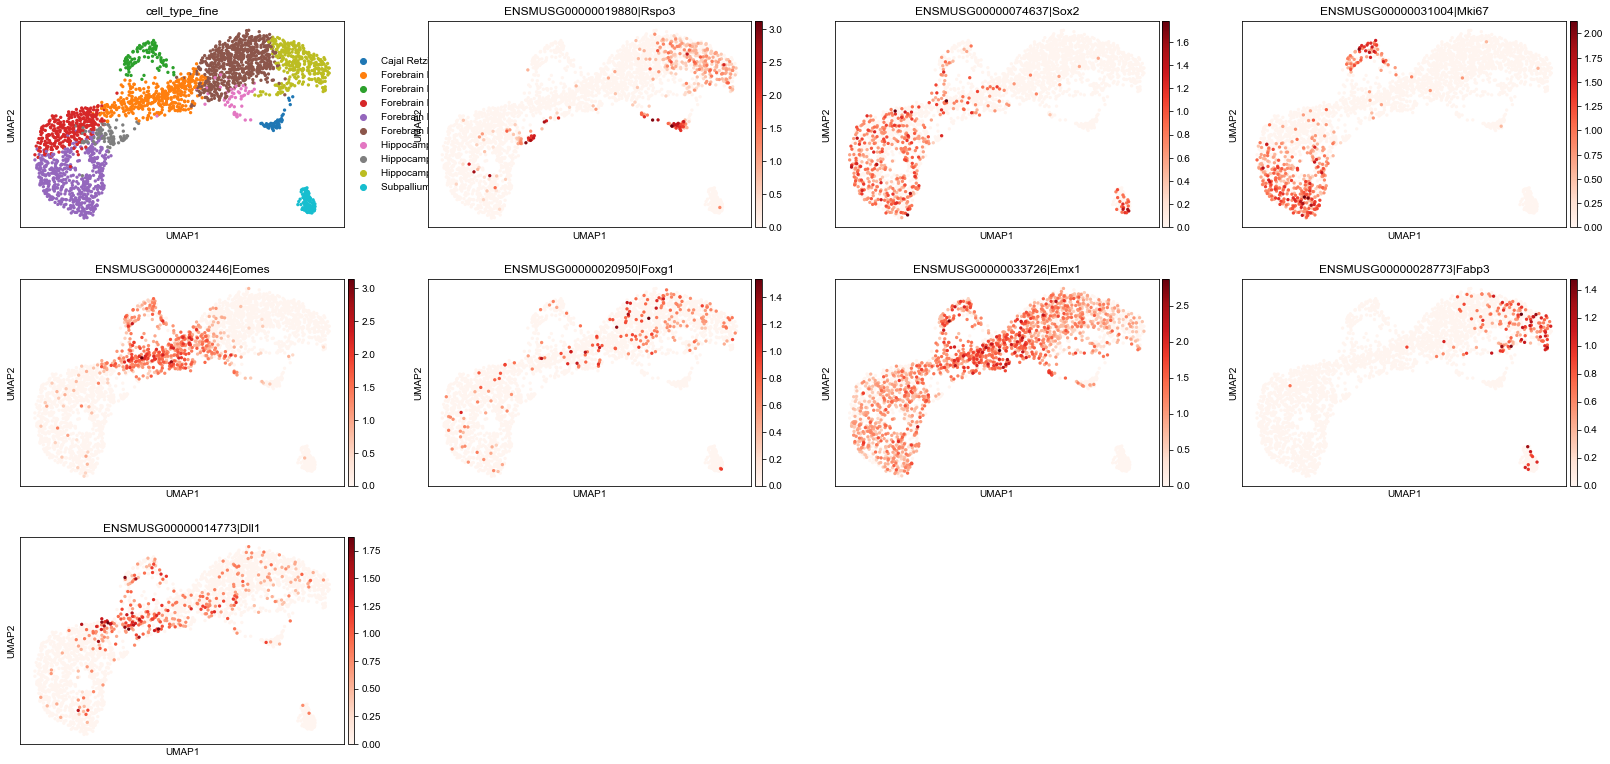

In [82]:
sc.pl.umap(adata_sub_full,color=['cell_type_fine',gene_map['Rspo3'],gene_map['Sox2'],gene_map['Mki67'],gene_map['Eomes'],
                                gene_map['Foxg1'],gene_map['Emx1'],gene_map['Fabp3'],gene_map['Dll1']],
           color_map='Reds')

In [91]:
gene_map['Insm1']

'ENSMUSG00000068154|Insm1'

In [92]:
genes_sub = list(adata_sub.var.index)
sorted_idx = list(adata_sub.obs.sort_values(by='dpt_pseudotime')['index'])

In [93]:
with open('/project/elkabetz_lab/Daniel/Transcriptional_Cascades/scripts/Transcriptional_Cascades/data/e13_5_mouse_forebrain_neuron_diff.2.raw_count_matrix.tsv','w') as output:
    output.write('cell_id\t'+'\t'.join(genes_sub)+'\n')
    for expr_row,cell in zip(adata[adata_sub.obs.loc[adata_sub.obs['index'][sorted_idx].index].index,genes_sub].X.toarray(),
                             adata_sub.obs['index'][sorted_idx].index):
        output.write(cell+'\t'+'\t'.join([str(int(x)) for x in expr_row])+'\n')
output.close()

In [ ]:
counts_dict = {}
genes = []
with open('/project/elkabetz_lab/Daniel/Transcriptional_Cascades/scripts/Transcriptional_Cascades/data/e13_5_mouse_forebrain_neuron_diff.1.raw_count_matrix.tsv','r') as expr_mat_fn:
    for i,row in enumerate(expr_mat_fn):
        spl = row.strip("\n").split("\t")
        if i == 0:
            for j in range(1,len(spl)):
                counts_dict[spl[j]] = []
                genes.append(spl[j])
        else:
            for j in range(1,len(spl)):
                counts_dict[genes[j-1]].append(int(spl[j]))